
### **Bayesian Inference**

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

## **Coin toss**

Estimate the parameter μ, probability for a coin to land head up, after n tosses.

In [17]:
mu=0.3 #probability of head
N=6 #number of samples
y=np.random.choice(2,N,p=[1-mu,mu]) #binary observation sequence
y

array([1, 0, 0, 0, 0, 0])

Assume a flat prior $P(\mu)=1$ for $0\le\mu\le 1$.  
Multiply prior and likelihood, and normalize to make the posterior.  
Make posterior as the new prior.

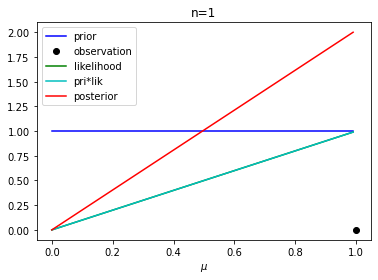

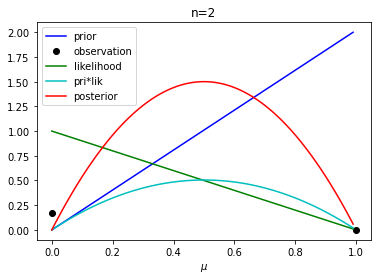

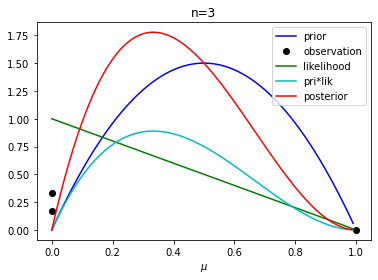

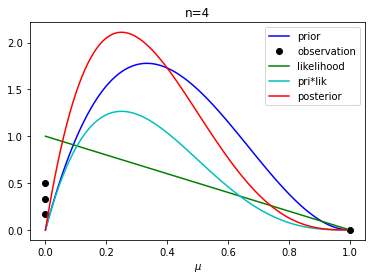

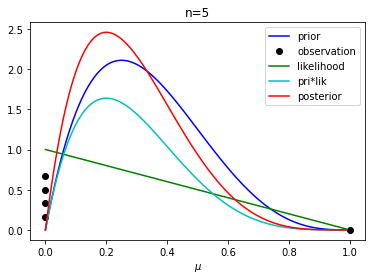

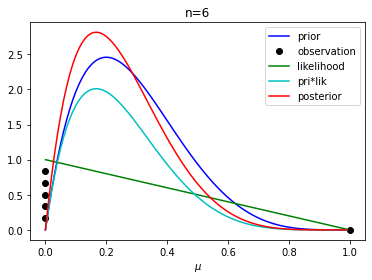

In [18]:
dx = 0.01 # plot step
x = np.arange( 0, 1, dx) #range of the parameter
prior = np.ones(len(x)) #uniform prior
for n in range(N):
  plt.figure() #a new figure
  #prior
  plt.plot(x,prior,'b')
  #observation
  plt.plot(y[0:n+1],np.arange(n+1)/N,'ko')
  #lilelihood
  likelihood = x*y[n] + (1-x)*(1-y[n]) #theta if head, 1-theta if tail
  plt.plot(x,likelihood,'g')
  #posterior
  prilik=prior*likelihood
  plt.plot(x,prilik,'c')
  marginal=sum(prilik)*dx #integrate over the parameter range
  posterior= prilik/marginal #normalize
  plt.plot(x,posterior,'r')
  plt.xlabel('$\mu$')
  plt.legend(('prior', 'observation', 'likelihood','pri*lik', 'posterior'))
  plt.title('n={0}'.format(n+1))
  plt.show()
  prior=posterior #new prior




## Noisy Observation
Estimate the mean $\mu$(mu) from noisy observation

In [19]:
# Noisy observation: y = N(mu,sigma)
mu = 2
sigma = 1
N = 6
y = mu + sigma*np.random.randn(N)
y

array([1.9549998 , 0.94204993, 1.67479666, 0.51572475, 0.01451514,
       2.0254409 ])

For simplicity, assume that we know the noise level $\sigma$.  
Assume a wide Gaussian prior $N(\mu_0,\sigma_0)$ for $\mu$.   Using the same code with a little bit tinkering. You can compare the code given below with the above one 

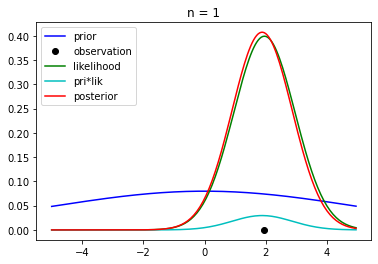

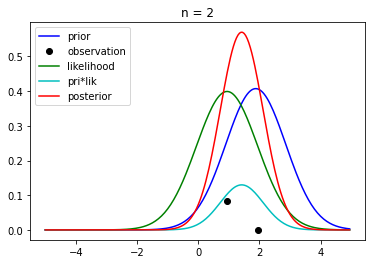

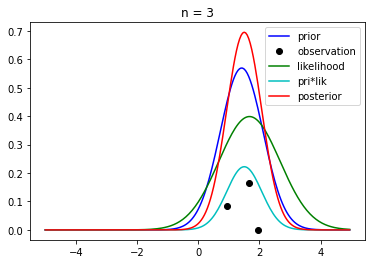

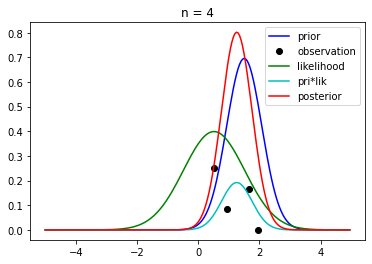

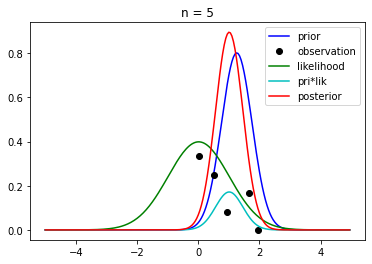

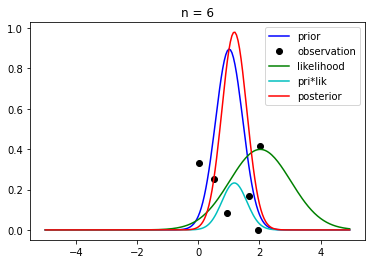

In [20]:
#Gaussian Prior parameter Mu and sigma
mu0 = 0 
sigma0 = 5

dx = 0.05   # plot step
x = np.arange( -5, 5, dx) #range of the parameter this time (-5 < u < 5) 
# prior of the mean
prior = np.exp(-(x/sigma0)**2/2)/(np.sqrt(2*np.pi)*sigma0) #(Not uniform)
for n in range(N):
    plt.figure()
    # prior
    plt.plot( x, prior, 'b')
    # observation
    plt.plot( y[0:n+1], 0.5*np.arange(n+1)/N, 'ko') #Change 0.5 mul
    # likelihood
    likelihood = np.exp(-((y[n]-x)/sigma)**2/2)/(np.sqrt(2*np.pi)*sigma) 
    #Check the gaussian prior and likelihood formula 
    plt.plot( x, likelihood, 'g')
    # posterior
    prilik = prior*likelihood
    plt.plot( x, prilik,'c')
    marginal = sum(prilik)*dx ## integrate over the parameter range
    posterior = prilik/marginal #normalize
    plt.plot( x, posterior, 'r')
    plt.legend(('prior', 'observation', 'likelihood', 'pri*lik', 'posterior'))
    plt.title('n = {0}'.format(n+1))
    prior = posterior  # new prior